# Heart Failure Prediction Supervised Leaning

Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,classification_report,accuracy_score,roc_auc_score,recall_score,mean_squared_error
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm



import time
import warnings
warnings.filterwarnings('ignore')

<h3>Read the Data</h3>

In [2]:
data = pd.read_csv('../data/heartFailurePrediction/heart.csv', sep=',')
# print(data.shape)
# data.head(5)
# get data info
print(data.shape)
data.info()

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<h3>Convert output(y) to binary classes</h3>

In [3]:
data.HeartDisease.unique()

array([0, 1], dtype=int64)

In [4]:
data.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<h3> Balance Check on Dataset</h3>

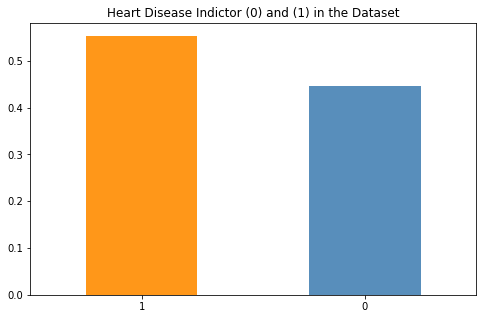

In [5]:

fig = plt.figure(figsize = (8,5))
data.HeartDisease.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)

plt.title('Heart Disease Indictor (0) and (1) in the Dataset')
plt.show()

1    508
0    410
Name: HeartDisease, dtype: int64


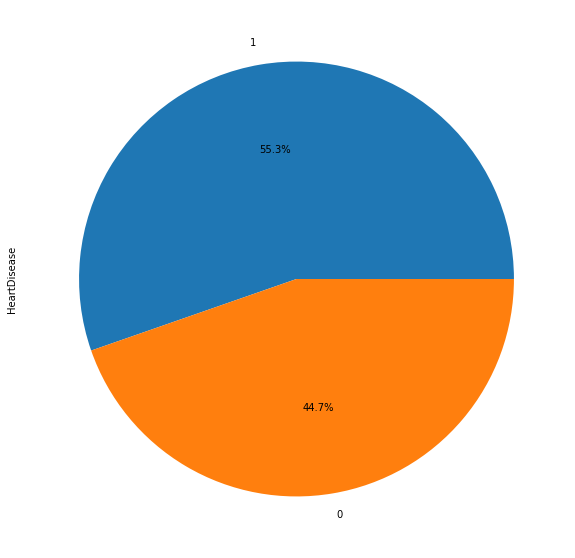

In [6]:
print(data["HeartDisease"].value_counts())
data["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

<h1>Undersatnding Data </h1>
<ul>
<li>Age: age of the patient [years]</li>
<li>Sex: sex of the patient [M: Male, F: Female]</li>
<li>ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
<li>RestingBP: resting blood pressure [mm Hg]</li>
<li>Cholesterol: serum cholesterol [mm/dl]</li>
<li>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
<li>RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
<li>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]</li>
<li>ExerciseAngina: exercise-induced angina [Y: Yes, N: No]</li>
<li>Oldpeak: oldpeak = ST [Numeric value measured in depression]</li>
<li>ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
<li>HeartDisease: output class [1: heart disease, 0: Normal]</li>
    </ul>

In [7]:
data.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [8]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

<AxesSubplot:>

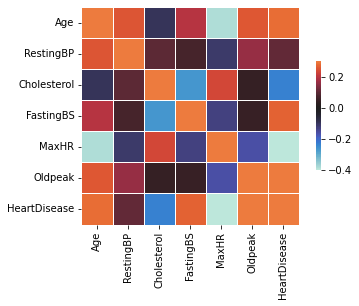

In [9]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<H2>CORRELATION MATRIX</H2>
<h3>Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” 
 function and can visualize the correlation matrix using plotly express.</h3>
<ul>
    <li>Lighter shades represents positive correlation</li>
    <li>Darker shades represents negative correlation</li>
</ul>

In [10]:
px.imshow(data.corr(),title="Correlation Plot, Heart Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation with "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1080x720 with 0 Axes>

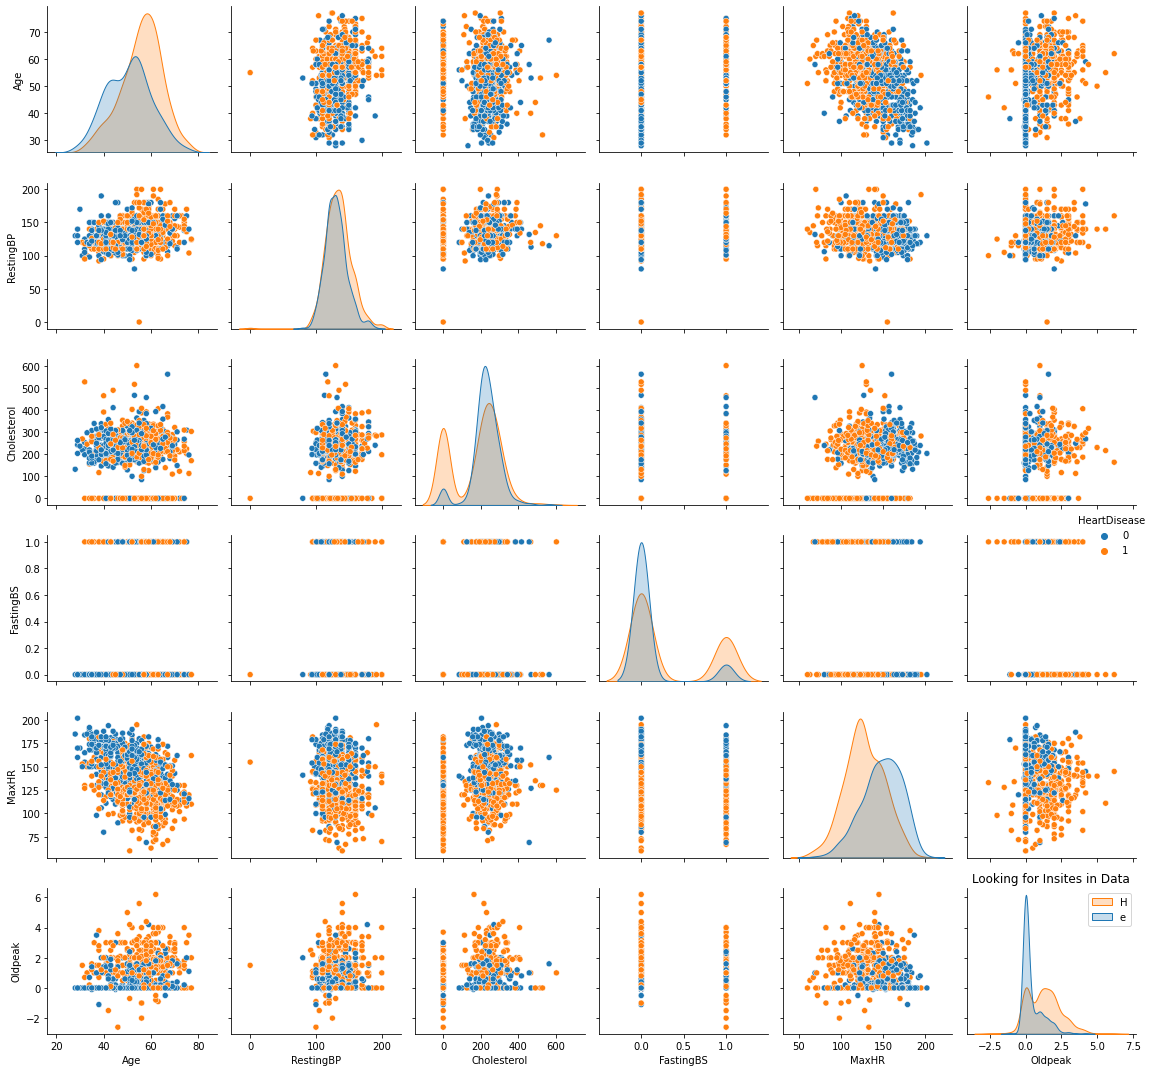

In [11]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Observation, Looks like all features are important.

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

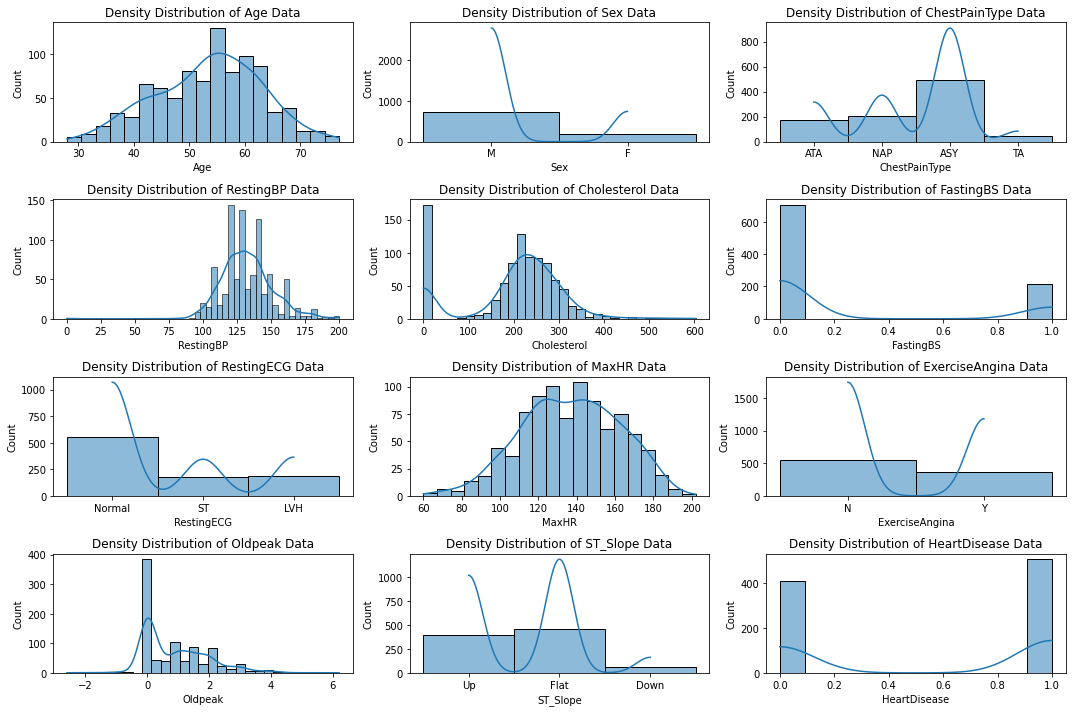

In [12]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Density Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

<h1>Data Preprocessing</h1>
<ul>
    <li> Null Values</li>
    <li><ul>Feature Scaling<li>Normalize</li><li>Standardize</li></ul></li>
    <li> Handling Categorical Variables
    </li>
</ul>

In [10]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

<h3>Null Value Check</h3>

In [11]:
# Do we have duplicates?
print('Number of Duplicates:', len(data[data.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', data.isnull().sum().sum())

Number of Duplicates: 0
Number of Missing Values: 0


In [12]:
print('Count of Features per Data Type:')
data.dtypes.value_counts()

Count of Features per Data Type:


int64      6
object     5
float64    1
dtype: int64

<h3> EDA</h3>

In [13]:





# Select numerical variables
data_X = data.drop("HeartDisease", axis=1)
# data_X = data_X.drop("Id", axis=1)
numeric = data_X.select_dtypes(exclude=object).columns
#numeric.remove('quality')
print(type(numeric))
for col in numeric:
    data_X[col] = StandardScaler().fit_transform(data_X[[col]])

data = data_X.join(data['HeartDisease'])


<class 'pandas.core.indexes.base.Index'>


In [14]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0 -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal   
1 -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2 -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3 -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4  0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0  1.382928              N -0.832432       Up             0  
1  0.754157              N  0.105664     Flat             1  
2 -1.525138              N -0.832432       Up             0  
3 -1.132156              Y  0.574711     Flat             1  
4 -0.581981              N -0.832432       Up             0

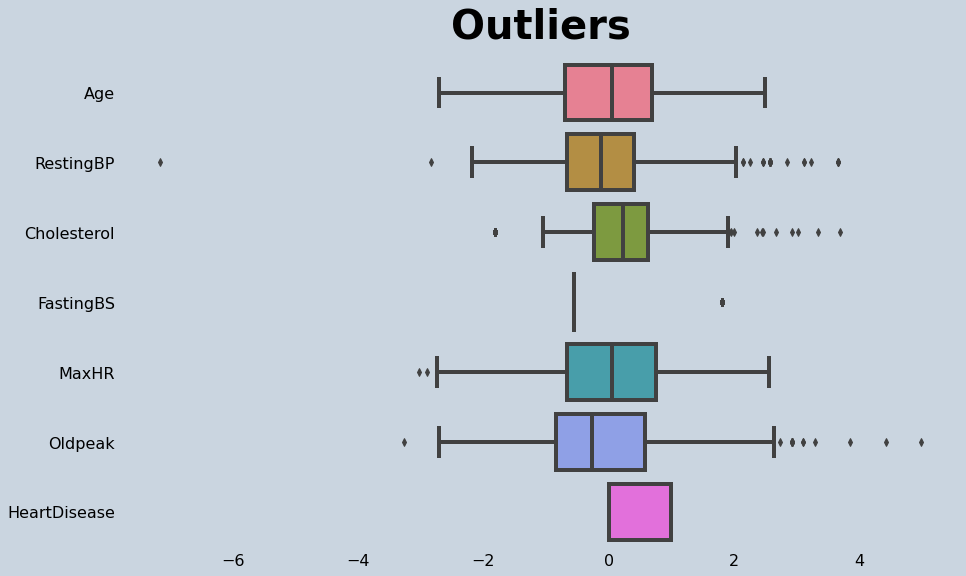

In [15]:
fig, ax = plt.subplots(figsize =(15,9))
ax.patch.set_facecolor('#CAD5E0')
fig.patch.set_facecolor('#CAD5E0')

sns.boxplot(data = data, ax=ax, palette='husl', orient="h", linewidth=4);

# Colors
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
ax.grid(False)

# Change color axis
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# Title
ax.set_title('Outliers', fontsize=40, fontweight="bold", pad=20);

<h3> Dealing with the outliers </h3>

<h3>RestingBP</h3>


In [16]:
# Dealing with the outliers (RestingBP)
q1 = data['RestingBP'].quantile(0.25)
q3 = data['RestingBP'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = data[(data['RestingBP'] >= Upper_tail) | (data['RestingBP'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
print('Outliers on RestingBP:')
u.value_counts(u['HeartDisease'])

Outliers on RestingBP:


HeartDisease
1    29
0    13
dtype: int64

Because the outliers are not extremely imbalanced on HeartDisease, I'll use the median imputation to remove the outliers from this feature.

In [17]:
# Median imputation (RestingBP)
med = np.median(data['RestingBP'])
for i in data['RestingBP']:
    if i > Upper_tail or i < Lower_tail:
            data['RestingBP'] = data['RestingBP'].replace(i, med)

<h3>Cholesterol</h3>

In [18]:
# Dealing with outliers (Cholesterol)
q1 = data['Cholesterol'].quantile(0.25)
q3 = data['Cholesterol'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = data[(data['Cholesterol'] >= Upper_tail) | (data['Cholesterol'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
print('Outliers on Cholesterol:')
u.value_counts(data['HeartDisease'])

Outliers on Cholesterol:


HeartDisease
1    158
0     25
dtype: int64

In [19]:
z = data[data['Cholesterol'] == 0]
z = pd.DataFrame(z)
print('Outliers on Cholesterol equal to 0:')
z.value_counts(data['HeartDisease'])

Outliers on Cholesterol equal to 0:


Series([], dtype: int64)

As almost all patients with We can see that almost all patients with colesterol equal 0 have a heart disease. For this reason, I'll not imputate the outliers equal to 0 in this feature. equal 0 have a heart disease. For this reason, I'll not imputate the outliers equal to 0 in this feature.

In [20]:
# Median imputation (Cholesterol) just on upper tail
med = np.median(data['Cholesterol'])
for i in data['Cholesterol']:
    if i > Upper_tail:
            data['Cholesterol'] = data['Cholesterol'].replace(i, med)

<h3>MaxHR</h3>
Only two outliers ignoring it

<h3>Oldpeak</h3>
Almost all the outliers from Oldpeak have heart disease. So, They are telling us a lot of information!

In [21]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0 -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal   
1 -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2 -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3 -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4  0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0  1.382928              N -0.832432       Up             0  
1  0.754157              N  0.105664     Flat             1  
2 -1.525138              N -0.832432       Up             0  
3 -1.132156              Y  0.574711     Flat             1  
4 -0.581981              N -0.832432       Up             0

In [22]:
print('Count of Features per Data Type:')
data.dtypes.value_counts()

Count of Features per Data Type:


float64    6
object     5
int64      1
dtype: int64

<h3>Encoding Categorical Features</h3>

In [23]:
# data_encoded = data.apply(LabelEncoder().fit_transform)
# data_encoded.head()

# Select numerical variables
objList = data.select_dtypes(include=object).columns

le = LabelEncoder()
for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

In [24]:
data.shape

(918, 12)

In [25]:
data.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.433140    1              1   0.410909     0.825070  -0.551341   
1 -0.478484    0              2   1.491752    -0.171961  -0.551341   
2 -1.751359    1              1  -0.129513     0.770188  -0.551341   
3 -0.584556    0              0   0.302825     0.139040  -0.551341   
4  0.051881    1              2   0.951331    -0.034755  -0.551341   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           1  1.382928               0 -0.832432         2             0  
1           1  0.754157               0  0.105664         1             1  
2           2 -1.525138               0 -0.832432         2             0  
3           1 -1.132156               1  0.574711         1             1  
4           1 -0.581981               0 -0.832432         2             0

<h1>Split the Data</h1>

In [26]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

print("Splitting StratifiedShuffleSplit into train/test")

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.3, random_state=15)
for train_ind, test_ind in split.split(data, data["HeartDisease"]):
    strat_train_set = data.loc[train_ind]
    strat_test_set = data.loc[test_ind]
    
train_set = strat_train_set
test_set = strat_test_set

y_train = train_set[["HeartDisease"]]
X_train = train_set.drop("HeartDisease", axis=1)
y_test = test_set[["HeartDisease"]]
X_test = test_set.drop("HeartDisease", axis=1)

y = data[["HeartDisease"]]
X = data.drop("HeartDisease", axis=1)

print("Setting up global variables")
classifier_accuracy = np.zeros(5)
time_train = np.zeros(5)
time_infer = np.zeros(5)
#print(X[:10])


Splitting StratifiedShuffleSplit into train/test
Setting up global variables


<h1> Models & evaluation </h1>

In [27]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    print('Starting ...')
    
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    
    print("**********************************")
    
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("Recall score of the Model: \n{}".format(recall_score(y_test, mod_pred)))
    
    print("Evaluation process is done ...")
    
    print("***********************************************")
    
    return mod

<h1>Decession Tree </h1>

<p>To prevent overfitting for Decission Tree one way is to control the maximum depth of the tree as a hyper-parameter. We use cross-validation over a range of hyper-parameter values to find the best value for the maximum depth of the tree using the validation_curve and GridSearchCV functions.

The second hyper-parameter that is often important for overfitting is a minimal cost-complexity pruning (CCP), where the regularization parameter  𝛼  allows us to prune the tree after it has been trained. Higher values of  𝛼  leads to more nodes being pruned out from the tree.

For the maximum depth of the tree, we see that the training score in the validation curve saturates at  1  as the model starts to overfit for higher values of max depth.

For the CCP  𝛼 , the training score goes down with increasing  𝛼  as more of the tree is pruned out.</p>

In [28]:
clf_dt = tree.DecisionTreeClassifier(random_state=15,criterion="gini")
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
dt_accuracy = recall_score(y_test, y_pred)
print('Recall Score of decision tree without any hyperparameter tuning: %.2f%%' % (dt_accuracy*100))

Recall Score of decision tree without any hyperparameter tuning: 85.62%


[Text(0.5113486842105263, 0.9666666666666667, 'X[10] <= 1.5\ngini = 0.494\nsamples = 642\nvalue = [287, 355]'),
 Text(0.21480263157894736, 0.9, 'X[2] <= 0.5\ngini = 0.295\nsamples = 362\nvalue = [65, 297]'),
 Text(0.11578947368421053, 0.8333333333333334, 'X[1] <= 0.5\ngini = 0.157\nsamples = 244\nvalue = [21, 223]'),
 Text(0.07368421052631578, 0.7666666666666667, 'X[9] <= 0.715\ngini = 0.401\nsamples = 36\nvalue = [10, 26]'),
 Text(0.06315789473684211, 0.7, 'X[5] <= 0.631\ngini = 0.48\nsamples = 25\nvalue = [10, 15]'),
 Text(0.05263157894736842, 0.6333333333333333, 'X[4] <= 1.086\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.042105263157894736, 0.5666666666666667, 'X[0] <= 0.529\ngini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.021052631578947368, 0.5, 'X[6] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.010526315789473684, 0.43333333333333335, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.031578947368421054, 0.43333333333333335, 'X[3] <= 0.627\ngini 

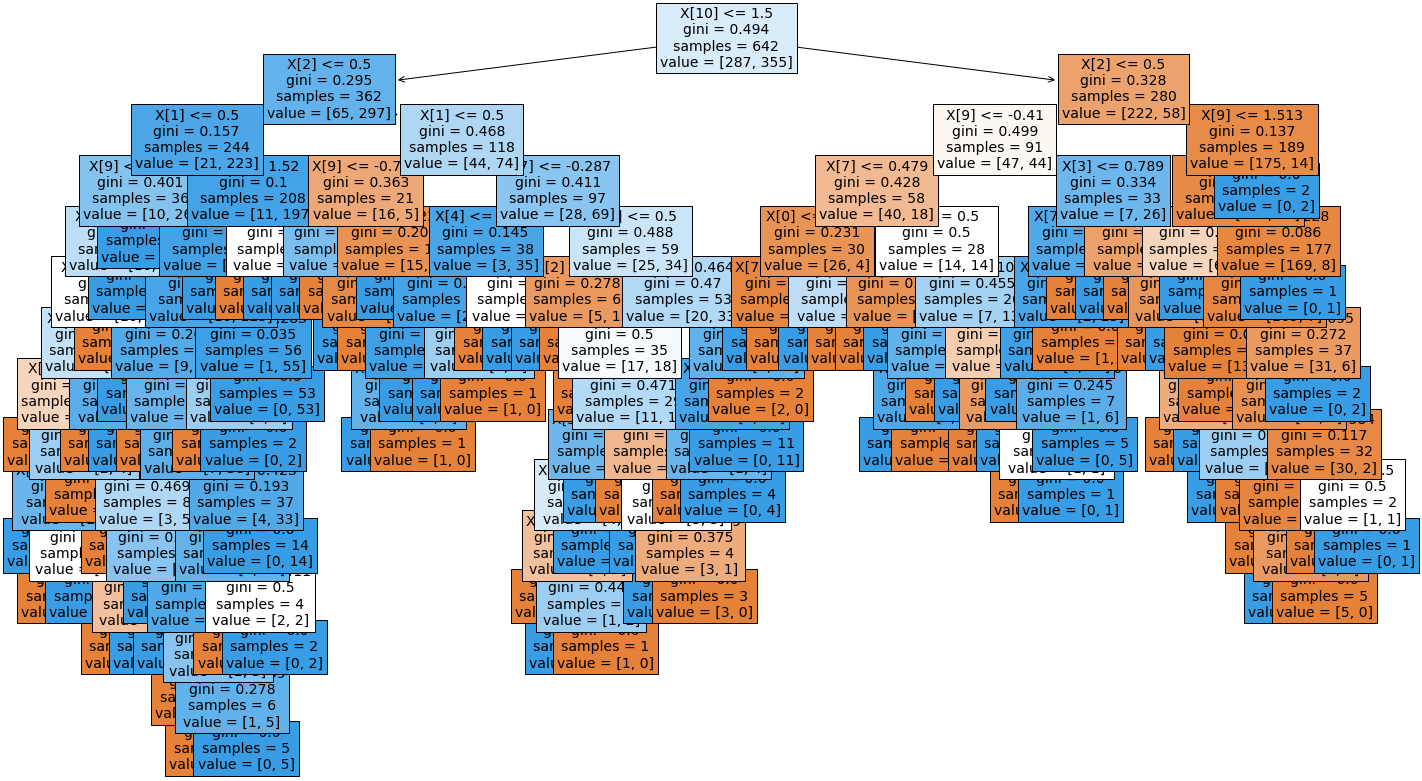

In [29]:
plt.figure(figsize=(24,14))
tree.plot_tree(clf_dt, filled=True, fontsize=14)

<h3>Random Forest</h3>

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf_dt_r = RandomForestClassifier(n_estimators=200,criterion="gini", random_state=15)
clf_dt_r.fit(X_train, y_train)
y_pred = clf_dt_r.predict(X_test)
dt_accuracy = recall_score(y_test, y_pred)
print('Recall Score of Random Forest: %.2f%%' % (dt_accuracy*100))

Recall Score of Random Forest: 92.81%


<h1> Decession Tree, Validation and Loss curves </h1>
<p> For a single tree we would like to tune the hyper paramters</p>

<p>changing cross validation CV, gives different results ?</p>

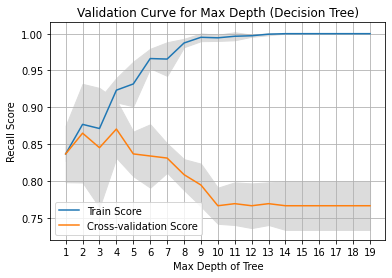

In [34]:
#classifier_decision_tree = tree.DecisionTreeClassifier(random_state=15)
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_range=np.arange(1,20), param_name='max_depth', scoring='recall', cv=5)

param_range= np.arange(1,20)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,20), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(1,20), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Max Depth (Decision Tree)")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Recall Score")
plt.xticks(np.arange(1,20))
plt.grid()
plt.savefig('../images/hfd/hfd_dt_vc_md.png')
plt.show()

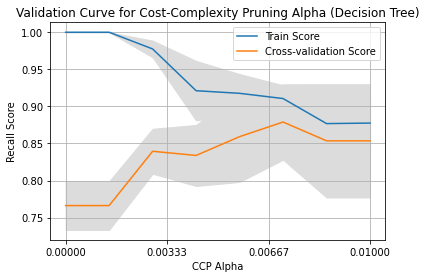

In [35]:
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_range=np.linspace(0,0.01,8), param_name='ccp_alpha', scoring='recall', cv=5)

param_range= np.linspace(0,0.01,8)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0,0.01,8), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0,0.01,8), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Cost-Complexity Pruning Alpha (Decision Tree)")
plt.xlabel("CCP Alpha")
plt.ylabel("Recall Score")
plt.xticks(np.linspace(0,0.01,4))
plt.grid()
plt.savefig('../images/hfd/hfd_dt_vc_ccp.png')
plt.show()

In [36]:
param_grid = {'max_depth': np.arange(1,20), 'ccp_alpha': np.linspace(0,0.01,8)}
#param_grid = {'max_depth': np.arange(1,36)}
clf_dt_g = GridSearchCV(clf_dt, param_grid=param_grid, scoring='recall', cv=5)
start_time = time.time()
clf_dt_g.fit(X_train, y_train)
end_time = time.time()
time_train[0] = end_time-start_time
print("Best params for decision tree:",clf_dt_g.best_params_)

start_time = time.time()
classifier_accuracy[0] = recall_score(y_test, clf_dt_g.predict(X_test))
end_time = time.time()
time_infer[0] = end_time-start_time
print("Recall Score for best decision tree:", classifier_accuracy[0])
print('Completed training in %f seconds' % time_train[0])
print('Inference time on test data: %f seconds' % time_infer[0])

Best params for decision tree: {'ccp_alpha': 0.007142857142857143, 'max_depth': 5}
Recall Score for best decision tree: 0.9084967320261438
Completed training in 4.152038 seconds
Inference time on test data: 0.002965 seconds


In [39]:
confusion_matrix(y_test, clf_dt_g.predict(X_test))

array([[ 99,  24],
       [ 14, 139]], dtype=int64)

<h3>Learning Curve</h3>

5


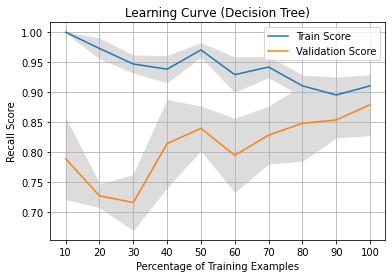

In [37]:
best_clf_dt = tree.DecisionTreeClassifier(random_state=42, max_depth=clf_dt_g.best_params_['max_depth'], ccp_alpha=clf_dt_g.best_params_['ccp_alpha'])
print(clf_dt_g.best_params_['max_depth'])
_, train_scores, test_scores = learning_curve(best_clf_dt, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), scoring='recall', cv=5)

#_, train_scores, test_scores = learning_curve(best_clf_dt, X, y, train_sizes=np.linspace(0.1,1.0,10), scoring='recall', n_jobs=1)

param_range= np.linspace(0.1,1.0,10)*100
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Recall Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('../images/hfd/hfd_dt_lc.png')
plt.show()


[Text(0.4230769230769231, 0.9, 'X[10] <= 1.5\ngini = 0.494\nsamples = 918\nvalue = [410, 508]'),
 Text(0.15384615384615385, 0.7, 'X[2] <= 0.5\ngini = 0.292\nsamples = 523\nvalue = [93, 430]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.165\nsamples = 364\nvalue = [33, 331]'),
 Text(0.23076923076923078, 0.5, 'X[1] <= 0.5\ngini = 0.47\nsamples = 159\nvalue = [60, 99]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.397\nsamples = 33\nvalue = [24, 9]'),
 Text(0.3076923076923077, 0.3, 'X[7] <= -0.012\ngini = 0.408\nsamples = 126\nvalue = [36, 90]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.203\nsamples = 61\nvalue = [7, 54]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.494\nsamples = 65\nvalue = [29, 36]'),
 Text(0.6923076923076923, 0.7, 'X[4] <= -1.43\ngini = 0.317\nsamples = 395\nvalue = [317, 78]'),
 Text(0.5384615384615384, 0.5, 'X[5] <= 0.631\ngini = 0.405\nsamples = 46\nvalue = [13, 33]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.491\nsamples = 23\nvalue = [13, 10]'),
 Text(0.61538461538

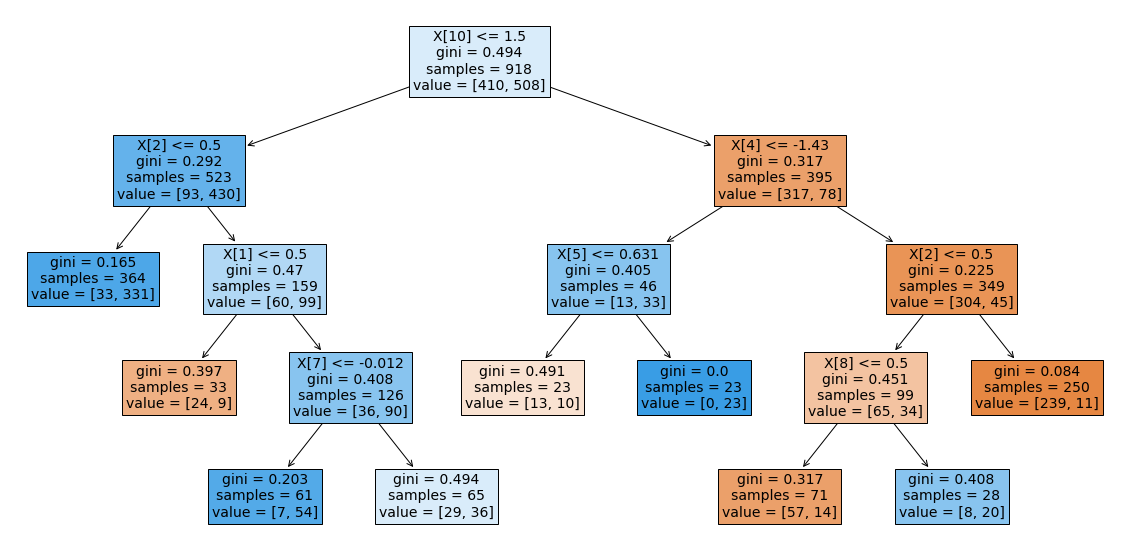

In [41]:
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=clf_dt_g.best_params_['max_depth'], ccp_alpha=clf_dt_g.best_params_['ccp_alpha'])
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)

The learning curve shows a large gap between the training and cross-validation scores. This means that there is high variance in the model, and this implies that we need more data, or we need to choose a model with fewer features (less complex model) if possible.

In [42]:
model_evaluation(best_clf_dt, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       123
           1       0.85      0.91      0.88       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

Confusion Matrix of the given Model: 
 [[ 99  24]
 [ 14 139]]
Recall score of the Model: 
0.9084967320261438
Evaluation process is done ...
***********************************************


DecisionTreeClassifier(ccp_alpha=0.007142857142857143, max_depth=5,
                       random_state=42)

<h1>Neural Network</h1>

In [42]:
clf_nn = MLPClassifier(hidden_layer_sizes=(4, 4), random_state=15, max_iter=1000)
clf_nn.fit(X_train, y_train)
y_pred = clf_nn.predict(X_test)
nn_accuracy = recall_score(y_test, y_pred)
print('Accuracy of neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy * 100))

Accuracy of neural network without hyperparameter tuning is 86.93%


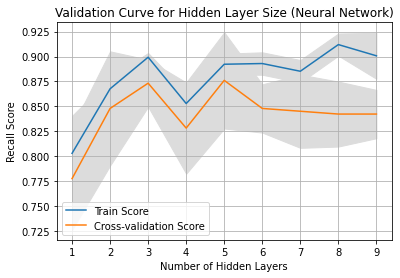

In [39]:
classifier_neural_network = MLPClassifier(random_state=15, max_iter=2000)
train_scores, test_scores = validation_curve(classifier_neural_network, X_train, y_train, param_name="hidden_layer_sizes", param_range=np.arange(1,10,1), scoring='recall', cv=5)

param_range= np.arange(1,10,1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,10,1), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(1,10,1), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Hidden Layer Size (Neural Network)")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Recall Score")
plt.grid()
plt.xticks(np.arange(1,10,1))
plt.savefig('../images/hfd/hfd_nn_vc_hl.png')
plt.show()

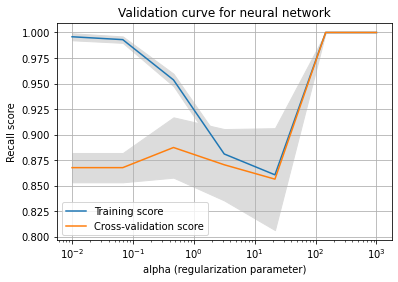

In [43]:
# Regularization parameter
alpha_range = np.logspace(-2, 3, 7)
train_scores, test_scores = validation_curve(classifier_neural_network, X_train, y_train, param_name="alpha", param_range=alpha_range, scoring='recall', cv=5)

param_range= alpha_range
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.semilogx(alpha_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_range, np.mean(test_scores, axis=1), label='Cross-validation score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title('Validation curve for neural network')
plt.xlabel('alpha (regularization parameter)')
plt.ylabel("Recall score")
plt.legend(loc="best")
plt.grid()
plt.savefig('../images/hfd/hfd_nn_vc_alpha.png')
plt.show()


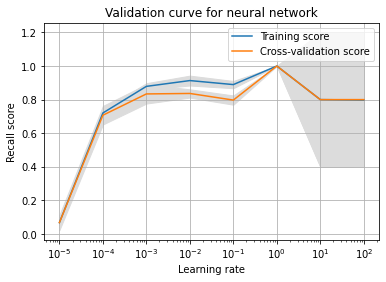

In [44]:
# Learning rate
lr_range = np.logspace(-5, 2, 8)
train_scores, test_scores = validation_curve(clf_nn, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, scoring='recall', cv=5)

param_range= lr_range
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title('Validation curve for neural network')
plt.xlabel('Learning rate')
plt.ylabel("Recall score")
plt.legend(loc="best")
plt.grid()
plt.savefig('../images/hfd/hfd_nn_vc_lri.png')
plt.show()

In [45]:

# Define grid for grid search after observing validation curves
param_grid = {'learning_rate_init': np.logspace(-2, 1, 4), 'hidden_layer_sizes': [2,3,4,5]}
#param_grid = {'learning_rate_init': [0.001,0.01,0.1], 'hidden_layer_sizes': [2,3,4,5]}
clf_nn_g = GridSearchCV(clf_nn, param_grid=param_grid, scoring='recall', cv=5)

t0 = time.time()
clf_nn_g.fit(X_train, y_train)
t1 = time.time()
time_train[1] = t1 - t0
print('Completed training in %f seconds' % time_train[1])
best_clf_nn = clf_nn_g
best_params = clf_nn_g.best_params_
print("Best parameters set found on development set:")
print(best_params)

start_time = time.time()
classifier_accuracy[1] = recall_score(y_test, clf_nn_g.predict(X_test))
end_time = time.time()
time_infer[1] = end_time-start_time
print("Recall score for best Neural Network:", classifier_accuracy[1])
print('Completed training in %f seconds' % time_train[1])

Completed training in 8.189039 seconds
Best parameters set found on development set:
{'hidden_layer_sizes': 3, 'learning_rate_init': 0.1}
Recall score for best Neural Network: 0.9150326797385621
Completed training in 8.189039 seconds


In [47]:
confusion_matrix(y_test, best_clf_nn.predict(X_test))

array([[ 99,  24],
       [ 13, 140]], dtype=int64)

In [45]:
model_evaluation(best_clf_nn, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       123
           1       0.85      0.92      0.88       153

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

Confusion Matrix of the given Model: 
 [[ 99  24]
 [ 13 140]]
Recall score of the Model: 
0.9150326797385621
Evaluation process is done ...
***********************************************


GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=1000,
                                     random_state=15),
             param_grid={'hidden_layer_sizes': [2, 3, 4, 5],
                         'learning_rate_init': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='recall')

<h3>Learning Curves</h3>

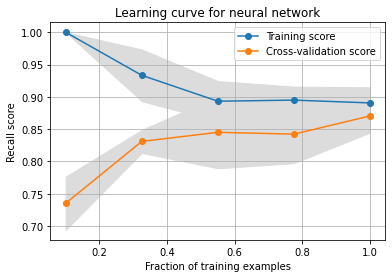

In [46]:
train_sizes = np.linspace(0.1, 1.0, 5)
clf_nn_l = MLPClassifier(random_state=15, max_iter=2000, hidden_layer_sizes=best_clf_nn.best_params_['hidden_layer_sizes'], learning_rate_init=best_clf_nn.best_params_['learning_rate_init'])
_, train_scores, test_scores = learning_curve(clf_nn_l, X_train, y_train, train_sizes=train_sizes, scoring='recall', cv=5)

param_range= np.linspace(0.1, 1.0, 5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title('Learning curve for neural network')
plt.xlabel('Fraction of training examples')
plt.ylabel("Recall score")
plt.legend(loc="best")
plt.grid()
plt.savefig('../images/hfd/hfd_nn_lc.png')
plt.show()

In [47]:
classifier_neural_network = MLPClassifier(random_state=15, max_iter=1, learning_rate_init=best_clf_nn.best_params_['learning_rate_init'], hidden_layer_sizes=best_clf_nn.best_params_['hidden_layer_sizes'], warm_start=True)
epochs = 300
loss_training = np.zeros(epochs)
score_training = np.zeros(epochs)
score_validation = np.zeros(epochs)

X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state=15)
for epoch in range(epochs):
    classifier_neural_network.fit(X_train_train, y_train_train)
    
    score_training[epoch] = recall_score(y_train_train, classifier_neural_network.predict(X_train_train))
    score_validation[epoch] = recall_score(y_train_val, classifier_neural_network.predict(X_train_val))
    
    loss_training[epoch] = classifier_neural_network.loss_
    
score_test = recall_score(y_test, classifier_neural_network.predict(X_test))
print("Recall Score:", score_test)

Recall Score: 0.9150326797385621


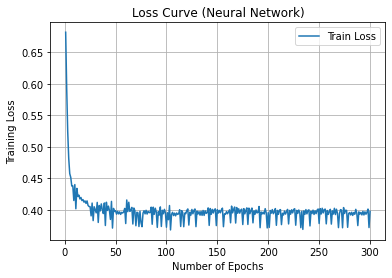

In [48]:
plt.figure()
plt.plot(np.arange(epochs)+1, loss_training, label='Train Loss')
plt.legend()
plt.title("Loss Curve (Neural Network)")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.savefig('../images/hfd/hfd_nn_loss_curve.png')
plt.show()

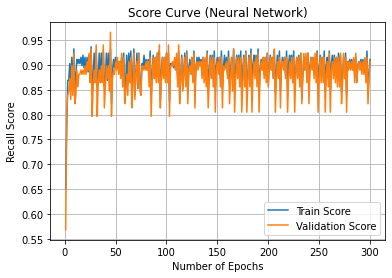

In [49]:
plt.figure()
plt.plot(np.arange(epochs)+1, score_training, label='Train Score')
plt.plot(np.arange(epochs)+1, score_validation, label='Validation Score')
plt.legend()
plt.title("Score Curve (Neural Network)")
plt.xlabel("Number of Epochs")
plt.ylabel("Recall Score")
plt.grid()
plt.savefig('../images/hfd/hfd_nn_score_curve.png')
plt.show()

In [50]:

mlp = MLPClassifier(random_state=15, max_iter=1, learning_rate_init=best_clf_nn.best_params_['learning_rate_init'], hidden_layer_sizes=best_clf_nn.best_params_['hidden_layer_sizes'], warm_start=True)
epochs = 300

training_mse = []
validation_mse = []
for epoch in range(epochs):
    mlp.fit(X_train, y_train) 
    Y_pred = mlp.predict(X_train)
    curr_train_score = mean_squared_error(y_train, Y_pred) # training performances
    Y_pred = mlp.predict(X_test) 
    curr_valid_score = mean_squared_error(y_test, Y_pred) # validation performances
    training_mse.append(curr_train_score)                  # list of training perf to plot
    validation_mse.append(curr_valid_score)  

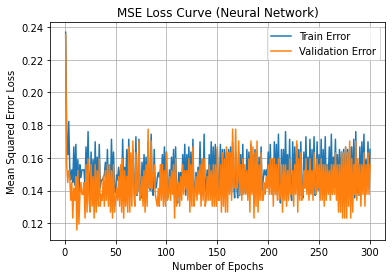

In [51]:
plt.figure()
plt.plot(np.arange(epochs)+1, training_mse, label='Train Error')
plt.plot(np.arange(epochs)+1, validation_mse, label='Validation Error')
plt.legend()
plt.title("MSE Loss Curve (Neural Network)")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.grid()
plt.savefig('../images/hfd/hfd_nn_loss_curve_2.png')
plt.show()

<h3>Boosting</h3>

The final classifier that we show here is the boosting method. We use the AdaBoost classifier with a single leaf decision tree as the weak learner. The hyper-parameters chosen for this classifier are the number of weak learners and the learning rate.

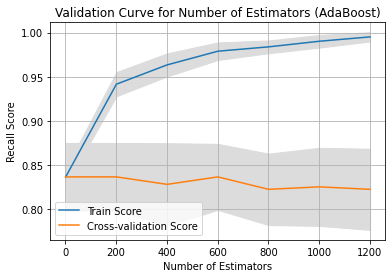

In [48]:
classifier_adaboost = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1), random_state=15)
train_scores, test_scores = validation_curve(classifier_adaboost, X_train, y_train, param_name="n_estimators", param_range=np.arange(1,1401,200), scoring='recall', cv=5)

param_range= np.arange(1,1401,200)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,1401,200), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(1,1401,200), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Number of Estimators (AdaBoost)")
plt.xlabel("Number of Estimators")
plt.ylabel("Recall Score")
plt.grid()
plt.savefig('../images/hfd/hfd_ada_vc_n_est.png')
plt.show()

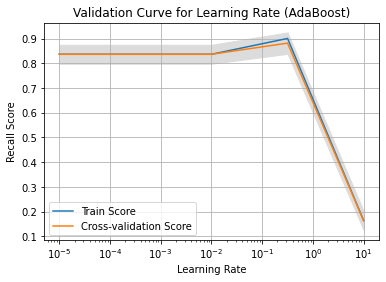

In [49]:
train_scores, test_scores = validation_curve(classifier_adaboost, X_train, y_train, param_name="learning_rate", param_range=np.logspace(-5,1,5), scoring='recall', cv=5)

param_range= np.logspace(-5,1,5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.semilogx(np.logspace(-5,1,5), np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(np.logspace(-5,1,5), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Learning Rate (AdaBoost)")
plt.xlabel("Learning Rate")
plt.ylabel("Recall Score")
plt.grid()
plt.savefig('../images/hfd/hfd_ada_vc_lr.png')
plt.show()

In [50]:
param_grid = {'learning_rate': np.logspace(-2,0,5), 'n_estimators': np.arange(1,1001,200)}
classifier_adaboost_best = GridSearchCV(classifier_adaboost, param_grid=param_grid, scoring='recall', cv=5)

start_time = time.time()
classifier_adaboost_best.fit(X_train, y_train)
end_time = time.time()
time_train[2] = end_time-start_time
print("Best params for AdaBoost:",classifier_adaboost_best.best_params_)

start_time = time.time()
classifier_accuracy[2] = recall_score(y_test, classifier_adaboost_best.predict(X_test))
end_time = time.time()
time_infer[2] = end_time-start_time
print("Recall Score for best AdaBoost:", classifier_accuracy[2])

Best params for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 201}
Recall Score for best AdaBoost: 0.9084967320261438


In [60]:
confusion_matrix(y_test, classifier_adaboost_best.predict(X_test))

array([[ 93,  30],
       [ 14, 139]], dtype=int64)

In [85]:
model_evaluation(classifier_adaboost_best, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       123
           1       0.82      0.91      0.86       153

    accuracy                           0.84       276
   macro avg       0.85      0.83      0.84       276
weighted avg       0.84      0.84      0.84       276

Confusion Matrix of the given Model: 
 [[ 93  30]
 [ 14 139]]
Recall score of the Model: 
0.9084967320261438
Evaluation process is done ...
***********************************************


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=15),
             param_grid={'learning_rate': array([0.01      , 0.03162278, 0.1       , 0.31622777, 1.        ]),
                         'n_estimators': array([  1, 201, 401, 601, 801])},
             scoring='recall')

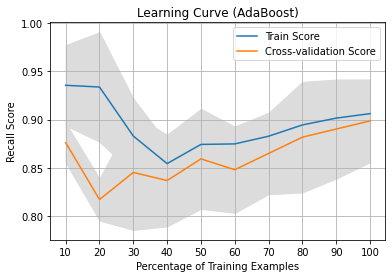

In [51]:
classifier_adaboost_learning_curve = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1), random_state=15, n_estimators=classifier_adaboost_best.best_params_['n_estimators'], learning_rate=classifier_adaboost_best.best_params_['learning_rate'])
_, train_scores, test_scores = learning_curve(classifier_adaboost_learning_curve, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), scoring='recall', cv=5)

param_range= np.linspace(0.1,1.0,10)*100
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Learning Curve (AdaBoost)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Recall Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('../images/hfd/hfd_ada_lc.png')
plt.show()

<h3>K-Nearest Neighbor</h3>

Next, we look at the $k$-Nearest Neighbor classifier ($k$-NN). For the $k$-NN classifier, we choose the number of neighbors and the power of the distance metric as the hyper-parameters, and plot the validation curves. As expected, with more number of neighbors, the bias in the model keeps increasing and both the training and cross-validation scores keep falling after a certain value on $k$.

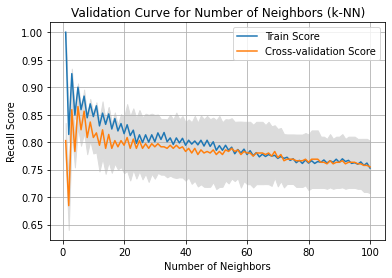

In [52]:
classifier_knn = KNeighborsClassifier()
train_scores, test_scores = validation_curve(classifier_knn, X_train, y_train, param_range=np.arange(1,101), param_name='n_neighbors', scoring='recall', cv=5)

param_range= np.arange(1,101)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,101), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(1,101), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Number of Neighbors (k-NN)")
plt.xlabel("Number of Neighbors")
plt.ylabel("Recall Score")
plt.grid()
plt.savefig('../images/hfd/hfd_knn_vc_n_nei.png')
plt.show()

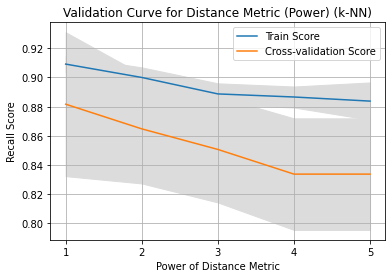

In [53]:
train_scores, test_scores = validation_curve(classifier_knn, X_train, y_train, param_name="p", param_range=np.arange(1,6), scoring='recall', cv=5)

param_range= np.arange(1,6)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,6), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(1,6), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Distance Metric (Power) (k-NN)")
plt.xlabel("Power of Distance Metric")
plt.ylabel("Recall Score")
plt.grid()
plt.xticks(np.arange(1,6))
plt.savefig('../images/hfd/hfd_knn_vc_p.png')
plt.show()

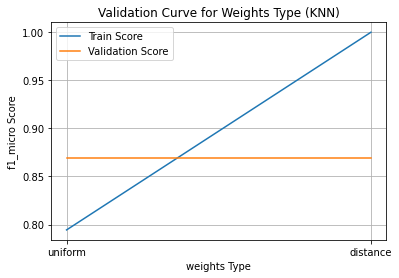

In [54]:
train_scores = np.zeros((2,1))
test_scores = np.zeros((2,1))

#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=15)

classifier_knn = KNeighborsClassifier(n_neighbors=46, weights='uniform')
classifier_knn.fit(X_train, y_train)
train_scores[0] = recall_score(y_train, classifier_knn.predict(X_train))
test_scores[0] = recall_score(y_test, classifier_knn.predict(X_test))

classifier_knn = KNeighborsClassifier(n_neighbors=46, weights='distance')
classifier_knn.fit(X_train, y_train)
train_scores[1] = recall_score(y_train, classifier_knn.predict(X_train))
test_scores[1] = recall_score(y_test, classifier_knn.predict(X_test))

plt.figure()
plt.plot(np.arange(0,2), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(0,2), np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Weights Type (KNN)")
plt.xlabel("weights Type")
plt.ylabel("f1_micro Score")
plt.grid()
plt.xticks(np.arange(2),['uniform','distance'])
#plt.savefig('../images/wq/wq_svm_vc_kernel.png')
plt.show()

In [55]:
param_grid = {'n_neighbors': np.arange(1,50), 'p':np.arange(1,6)}
classifier_knn_best = GridSearchCV(classifier_knn, param_grid=param_grid, scoring='recall', cv=5)

start_time = time.time()
classifier_knn_best.fit(X_train, y_train)
end_time = time.time()
time_train[3] = end_time-start_time
print("Best params for k-NN:",classifier_knn_best.best_params_)

start_time = time.time()
classifier_accuracy[3] = recall_score(y_test, classifier_knn_best.predict(X_test))
end_time = time.time()
time_infer[3] = end_time-start_time
print("Recall Score for best k-NN:", classifier_accuracy[3])

Best params for k-NN: {'n_neighbors': 6, 'p': 1}
Recall Score for best k-NN: 0.9084967320261438


In [56]:
confusion_matrix(y_test, classifier_knn_best.predict(X_test))

array([[101,  22],
       [ 14, 139]], dtype=int64)

In [86]:
model_evaluation(classifier_knn_best, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       123
           1       0.86      0.91      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.87       276
weighted avg       0.87      0.87      0.87       276

Confusion Matrix of the given Model: 
 [[101  22]
 [ 14 139]]
Recall score of the Model: 
0.9084967320261438
Evaluation process is done ...
***********************************************


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=46, weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': array([1, 2, 3, 4, 5])},
             scoring='recall')

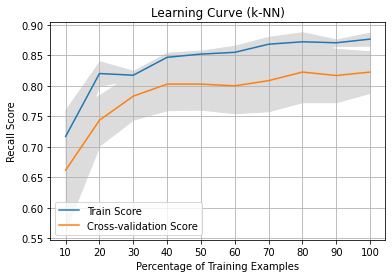

In [57]:
classifier_knn_learning = KNeighborsClassifier(n_neighbors=classifier_knn_best.best_params_['n_neighbors'], p=classifier_knn_best.best_params_['p'])
_, train_scores, test_scores = learning_curve(classifier_knn_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), scoring='recall', cv=5)

param_range= np.linspace(0.1,1.0,10)*100
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Learning Curve (k-NN)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Recall Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('../images/hfd/hfd_knn_lc.png')
plt.show()

<h3> SVM </h3>

The performance of the SVM classifier is shown next. The validation curves are shown first, with a varying regularizaion parameter $C$ as well as for different types of kernels. In order to plot the validation curve for the different kernels, the training set is further divided to create a validation set.

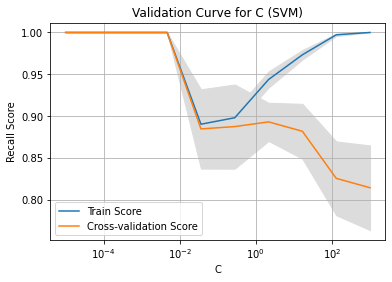

In [58]:
classifier_svm = svm.SVC(random_state=15)
train_scores, test_scores = validation_curve(classifier_svm, X_train, y_train, param_name="C", param_range=np.logspace(-5,3,10), scoring='recall', cv=5)

param_range= np.logspace(-5,3,10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.semilogx(np.logspace(-5,3,10), np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(np.logspace(-5,3,10), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for C (SVM)")
plt.xlabel("C")
plt.ylabel("Recall Score")
plt.grid()
plt.savefig('../images/hfd/hfd_svm_vc_c.png')
plt.show()

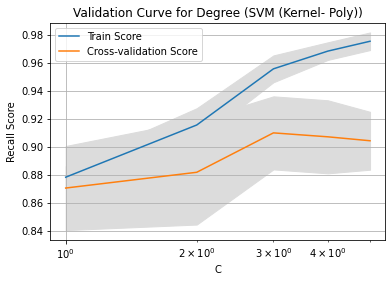

In [59]:
classifier_svm_ply = svm.SVC(random_state=15, kernel='poly')
train_scores, test_scores = validation_curve(classifier_svm_ply, X_train, y_train, param_name="degree", param_range=[1,2,3,4,5], scoring='recall', cv=5)

param_range= [1,2,3,4,5]
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.semilogx([1,2,3,4,5], np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx([1,2,3,4,5], np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Degree (SVM (Kernel- Poly))")
plt.xlabel("C")
plt.ylabel("Recall Score")
plt.grid()
plt.savefig('../images/hfd/hfd_svm_vc_degree.png')
plt.show()

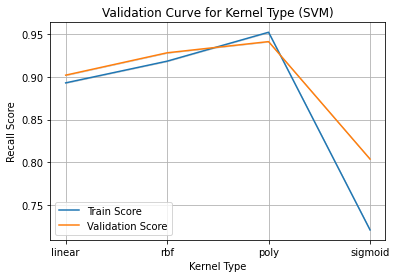

In [60]:
train_scores = np.zeros((4,1))
test_scores = np.zeros((4,1))

#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=15)


classifier_svm = svm.SVC(random_state=15, kernel='linear')
classifier_svm.fit(X_train, y_train)
train_scores[0] = recall_score(y_train, classifier_svm.predict(X_train))
test_scores[0] = recall_score(y_test, classifier_svm.predict(X_test))

classifier_svm = svm.SVC(random_state=15, kernel='rbf')
classifier_svm.fit(X_train, y_train)
train_scores[1] = recall_score(y_train, classifier_svm.predict(X_train))
test_scores[1] = recall_score(y_test, classifier_svm.predict(X_test))

classifier_svm = svm.SVC(random_state=15, kernel='poly')
classifier_svm.fit(X_train, y_train)
train_scores[2] = recall_score(y_train, classifier_svm.predict(X_train))
test_scores[2] = recall_score(y_test, classifier_svm.predict(X_test))

classifier_svm = svm.SVC(random_state=15, kernel='sigmoid')
classifier_svm.fit(X_train, y_train)
train_scores[3] = recall_score(y_train, classifier_svm.predict(X_train))
test_scores[3] = recall_score(y_test, classifier_svm.predict(X_test))

param_range= np.arange(0,4)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(0,4), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(0,4), np.mean(test_scores, axis=1), label='Validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Kernel Type (SVM)")
plt.xlabel("Kernel Type")
plt.ylabel("Recall Score")
plt.grid()
plt.xticks(np.arange(4),['linear','rbf','poly','sigmoid'])
plt.savefig('../images/hfd/hfd_svm_vc_kernel.png')
plt.show()

In [61]:
param_grid = {'degree': [1,2,3,4,5], 'kernel': ['poly']}
classifier_svm_best = GridSearchCV(classifier_svm, param_grid=param_grid, scoring='recall', cv=5)

start_time = time.time()
classifier_svm_best.fit(X_train, y_train)
end_time = time.time()
time_train[4] = end_time-start_time
print("Best params for SVM:",classifier_svm_best.best_params_)

start_time = time.time()
classifier_accuracy[4] = recall_score(y_test, classifier_svm_best.predict(X_test))
end_time = time.time()
time_infer[4] = end_time-start_time
print("Recall Score for best SVM:", classifier_accuracy[4])

Best params for SVM: {'degree': 3, 'kernel': 'poly'}
Recall Score for best SVM: 0.9411764705882353


In [62]:
# param_grid = {'C': np.logspace(-4,-2,5), 'kernel': ['linear','rbf','poly','sigmoid']}
# classifier_svm_best = GridSearchCV(classifier_svm, param_grid=param_grid, scoring='recall', cv=5)

# start_time = time.time()
# classifier_svm_best.fit(X_train, y_train)
# end_time = time.time()
# time_train[4] = end_time-start_time
# print("Best params for SVM:",classifier_svm_best.best_params_)

# start_time = time.time()
# classifier_accuracy[4] = recall_score(y_test, classifier_svm_best.predict(X_test))
# end_time = time.time()
# time_infer[4] = end_time-start_time
# print("Recall Score for best SVM:", classifier_accuracy[4])

In [63]:
confusion_matrix(y_test, classifier_svm_best.predict(X_test))

array([[ 95,  28],
       [  9, 144]], dtype=int64)

In [64]:
model_evaluation(classifier_svm_best, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.91      0.77      0.84       123
           1       0.84      0.94      0.89       153

    accuracy                           0.87       276
   macro avg       0.88      0.86      0.86       276
weighted avg       0.87      0.87      0.86       276

Confusion Matrix of the given Model: 
 [[ 95  28]
 [  9 144]]
Recall score of the Model: 
0.9411764705882353
Evaluation process is done ...
***********************************************


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid', random_state=15),
             param_grid={'degree': [1, 2, 3, 4, 5], 'kernel': ['poly']},
             scoring='recall')

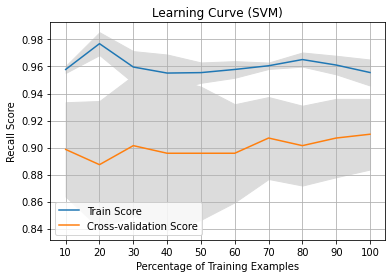

In [65]:
classifier_svm_learning = svm.SVC(random_state=15, degree=classifier_svm_best.best_params_['degree'], kernel=classifier_svm_best.best_params_['kernel'])
_, train_scores, test_scores = learning_curve(classifier_svm_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), scoring='recall', cv=5)

param_range= np.linspace(0.1,1.0,10)*100
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Learning Curve (SVM)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Recall Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('../images/hfd/hfd_svm_lc.png')
plt.show()

In [76]:
print(classifier_accuracy)

[0.90849673 0.91503268 0.90849673 0.90849673 0.94117647]


In [77]:
print(time_train)

[ 4.06288123  4.6685729  65.53188896 16.78153896  0.2513628 ]


In [78]:
print(time_infer)

[0.00295925 0.00327349 0.03175616 0.00500083 0.00303721]


In [56]:
classifiers = ('DT', 'NN', 'AdaBoost', 'k-NN', 'SVM')
y_ticks = np.arange(len(classifiers))

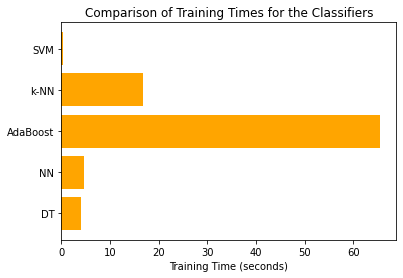

In [81]:
plt.figure()
plt.barh(y_ticks, time_train, color='orange')
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of Training Times for the Classifiers')
plt.xlabel('Training Time (seconds)')
plt.savefig('../images/hfd_training.png', dpi=300, bbox_inches='tight')
plt.show()

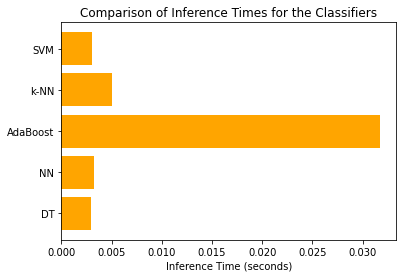

In [82]:
plt.figure()
plt.barh(y_ticks, time_infer, color='orange')
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of Inference Times for the Classifiers')
plt.xlabel('Inference Time (seconds)')
plt.savefig('../images/hfd_inference.png', dpi=300, bbox_inches='tight')
plt.show()

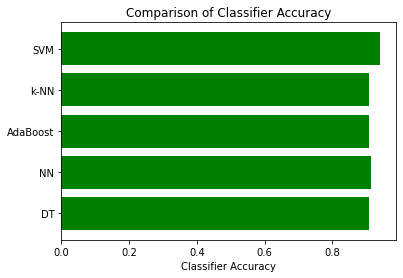

In [83]:
plt.figure()
plt.barh(y_ticks, classifier_accuracy, color='green')
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of Classifier Accuracy')
plt.xlabel('Classifier Accuracy')
#plt.gca().set_xlim(0.94, 1.0)
plt.savefig('../images/hfd_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
classifiers = ('DT', 'NN', 'AdaBoost', 'k-NN', 'SVM')
c_accuracy = [0.90849673, 0.91503268, 0.90849673, 0.90849673, 0.94117647]

In [59]:
c_time_train = [ 4.06288123,  4.6685729,  65.53188896, 16.78153896,  0.2513628 ]

In [60]:
c_time_infer = [0.00295925, 0.00327349, 0.03175616, 0.00500083, 0.00303721]

In [62]:
df = pd.DataFrame()
df['Classifier'] = classifiers
df['Recall Score'] = c_accuracy
df['Time Train'] = c_time_train
df['Time Infer'] = c_time_infer
df

Classifier  Recall Score  Time Train  Time Infer
0         DT      0.908497    4.062881    0.002959
1         NN      0.915033    4.668573    0.003273
2   AdaBoost      0.908497   65.531889    0.031756
3       k-NN      0.908497   16.781539    0.005001
4        SVM      0.941176    0.251363    0.003037

In [63]:
cm = sns.light_palette('green', as_cmap='True')
s = df.style.background_gradient(cmap=cm)
s

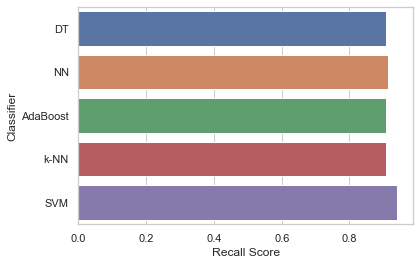

In [65]:
sns.set(style='whitegrid')
ax = sns.barplot(y='Classifier', x= 'Recall Score', data=df)

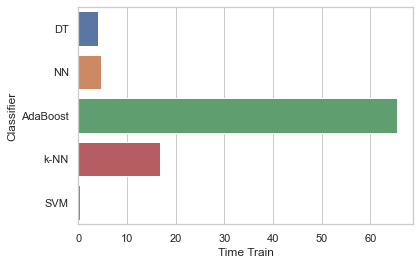

In [66]:
sns.set(style='whitegrid')
ax = sns.barplot(y='Classifier', x= 'Time Train', data=df)

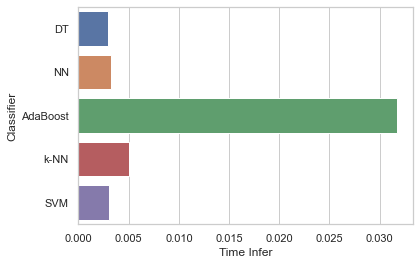

In [67]:
sns.set(style='whitegrid')
ax = sns.barplot(y='Classifier', x= 'Time Infer', data=df)

In [68]:
classifiers = ('DT', 'NN', 'AdaBoost', 'k-NN', 'SVM')
c_precesion = [0.86, 0.87, 0.84, 0.87, 0.87]
c_recall = [ 0.86,  0.87, 0.84, 0.87,  0.87]
c_f1_score = [0.86, 0.87, 0.84, 0.87, 0.86]

In [69]:
df2 = pd.DataFrame()
df2['Classifier'] = classifiers
df2['precesion'] = c_precesion
df2['recall'] = c_recall
df2['f1-score'] = c_f1_score
df2

Classifier  precesion  recall  f1-score
0         DT       0.86    0.86      0.86
1         NN       0.87    0.87      0.87
2   AdaBoost       0.84    0.84      0.84
3       k-NN       0.87    0.87      0.87
4        SVM       0.87    0.87      0.86

In [70]:
cm = sns.light_palette('green', as_cmap='True')
s = df2.style.background_gradient(cmap=cm)
s

<h1>XGBoost</h1>

In [25]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=data_tree,y=y)):
    
    X_train=data_tree.loc[trn_,feature_col_tree]
    y_train=data_tree.loc[trn_,target]
    
    X_valid=data_tree.loc[val_,feature_col_tree]
    y_valid=data_tree.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        82
           1       0.93      0.76      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 1 : 0.845767575322812
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        82
           1       0.94      0.80      0.87       102

    accuracy                           0.86       184
   macro avg       0.87      0.87      0.86       184
weighted avg       0.88      0.86      0.86       184

The accuracy for 2 : 0.8714729794356767
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        82
           1       0.76      0.97      0.85       102

    accuracy                           0.82   

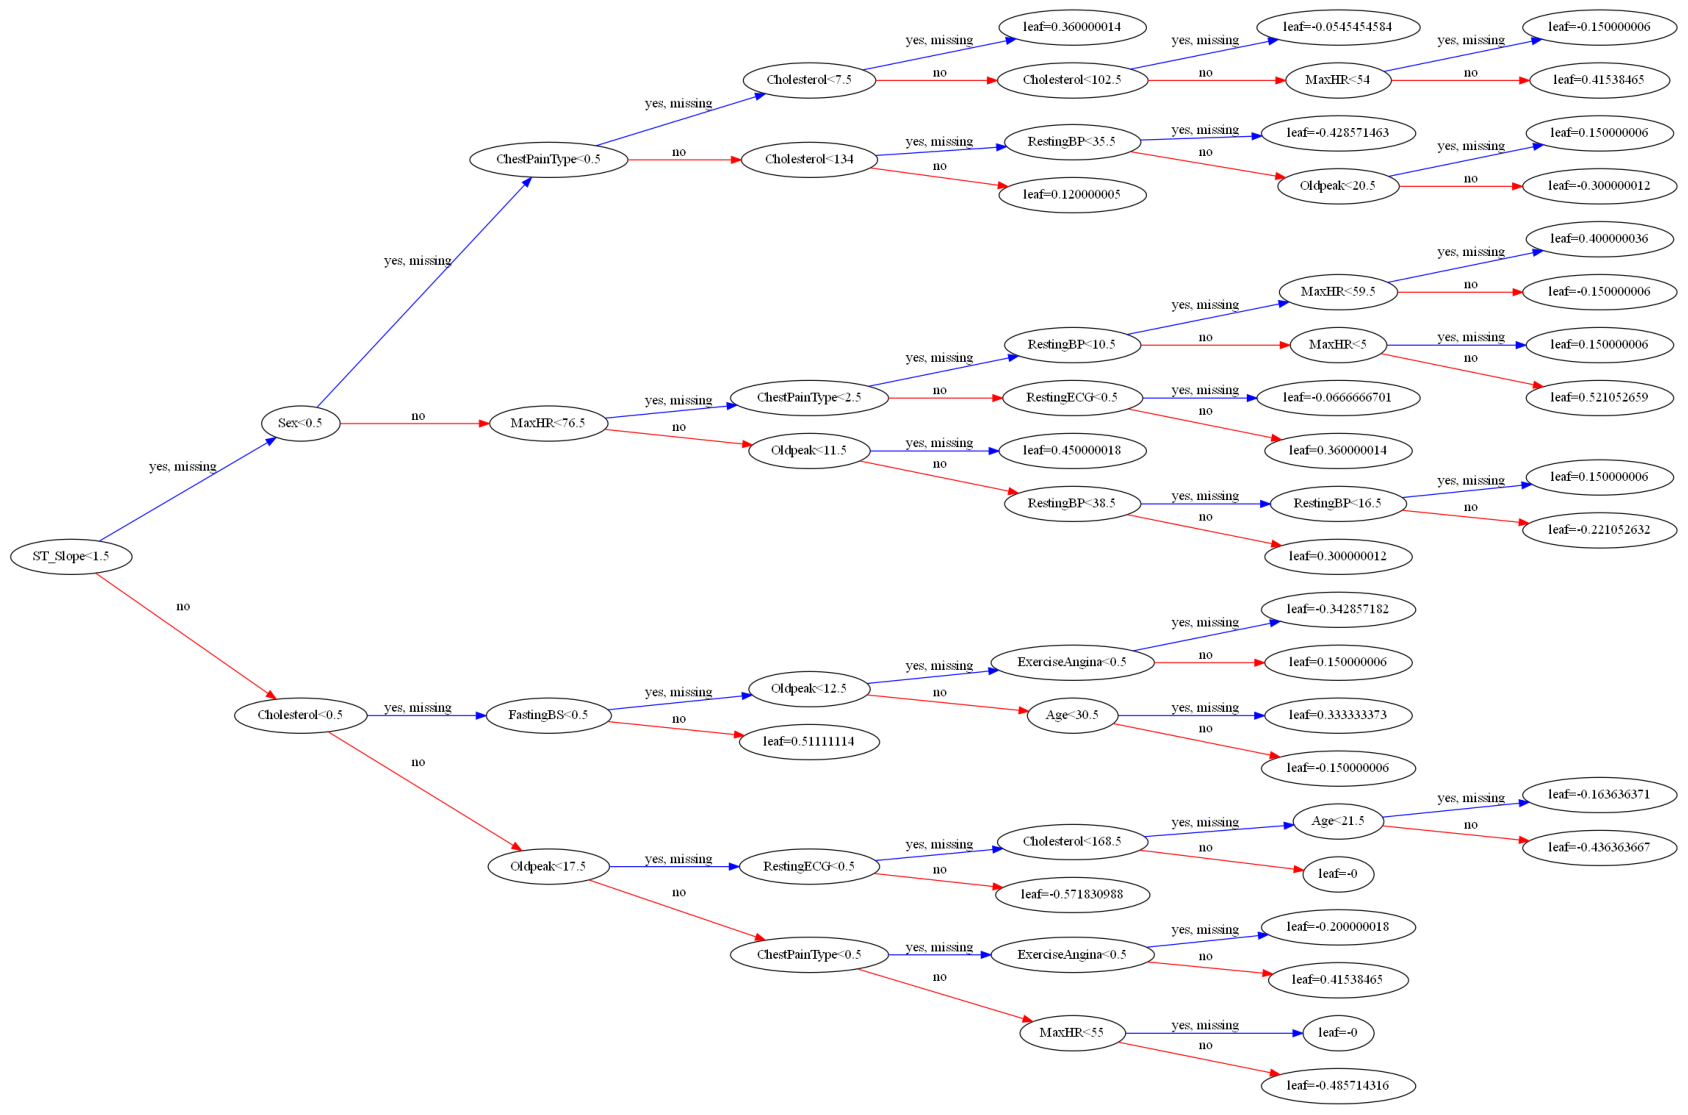

In [26]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()